<a href="https://colab.research.google.com/github/windn19/site/blob/master/Start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/models/money.csv', index_col=0)

In [ ]:
df.head()

Name  ...       Emb
0  1 рубль - FC3316  ...  0.517964
1  1 рубль - FC3261  ...  0.515696
2  3 рубля - BS-186  ...  0.505253
3  1 рубль - CS-385  ...  0.487688
4  1 рубль - CS-093  ...  0.543046

[5 rows x 7 columns]

In [ ]:
inp = np.load('/content/drive/MyDrive/models/inp.npy', allow_pickle=True)
# response = requests.get('https://www.numizmatik.ru/images/shopcoins/2000/01/667/985/1667985_a.jpg')
# img1 = Image.open(BytesIO(response.content))

In [ ]:
inp.shape

(4, 420, 840, 3)

In [ ]:
x3 = df['Emb'].to_numpy()


In [ ]:
x3 = x3.reshape(-1, 1)

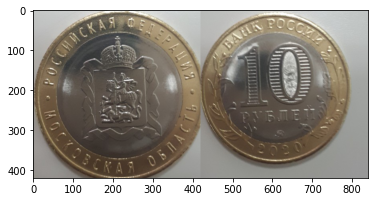

In [ ]:
plt.imshow(inp[0].squeeze())
plt.show()

In [ ]:
!unzip /content/drive/MyDrive/9.zip -d /content/val

Archive:  /content/drive/MyDrive/9.zip
  inflating: /content/val/1.jpg      
  inflating: /content/val/2.jpg      
  inflating: /content/val/3.jpg      
  inflating: /content/val/4.jpg      
  inflating: /content/val/5.jpg      
  inflating: /content/val/6.jpg      
  inflating: /content/val/7.jpg      
  inflating: /content/val/8.jpg      


In [ ]:
data = []
for file in range(1, 9, 2):
  img = Image.open(f'/content/val/{file}.jpg')
  img1 = Image.open(f'/content/val/{file+1}.jpg')
  img = img.resize((420, 420))
  img = img.convert('RGB')
  img1 = img1.resize((420, 420))
  img1 = img1.convert('RGB')
  if file == 5:
    img_arr = np.array(np.concatenate((img, img1), axis=1))
  else:
    img_arr = np.array(np.concatenate((img1, img), axis=1))
  data.append(img_arr)
ar = np.array(data)
ar.shape

(4, 420, 840, 3)

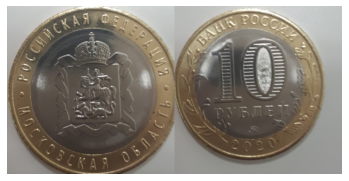

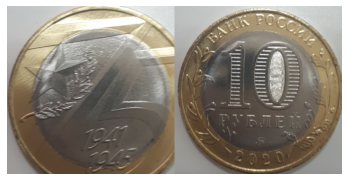

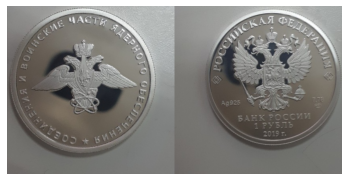

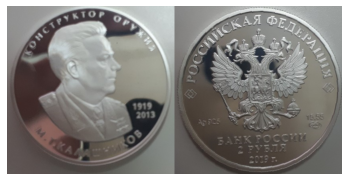

In [ ]:
for i in range(inp.shape[0]):
  plt.imshow(inp[i])
  plt.axis('off')
  plt.show()

In [ ]:
df.iloc[122, :]

Name                                        2 рубля - ER89-09
Year                                                     2019
Nom                                                         1
LongName                    Конструктор оружия М.Т.Калашников
Avers       https://www.numizmatik.ru/images/shopcoins/200...
Revers      https://www.numizmatik.ru/images/shopcoins/200...
Name: 122, dtype: object

In [ ]:
img = image.array_to_img(inp[0])

In [ ]:
img.save('7.jpg')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
!mkdir image

In [ ]:
for i in [250, 300, 350, 400, 450]:
  response = requests.get(df['Avers'][i])
  img = Image.open(BytesIO(response.content))
  img = img.resize((1100, 1100))
  img = img.convert('RGB')
  img.save(f'/content/image/{i}a.jpg')
  response = requests.get(df['Revers'][i])
  img = Image.open(BytesIO(response.content))
  img = img.resize((1100, 1100))
  img = img.convert('RGB')
  img.save(f'/content/image/{i}r.jpg')

In [ ]:
!zip -r -9 www-archive.zip /content/image/*

  adding: content/image/250a.jpg (deflated 2%)
  adding: content/image/250r.jpg (deflated 2%)
  adding: content/image/300a.jpg (deflated 2%)
  adding: content/image/300r.jpg (deflated 2%)
  adding: content/image/350a.jpg (deflated 3%)
  adding: content/image/350r.jpg (deflated 3%)
  adding: content/image/400a.jpg (deflated 2%)
  adding: content/image/400r.jpg (deflated 3%)
  adding: content/image/450a.jpg (deflated 3%)
  adding: content/image/450r.jpg (deflated 3%)


In [ ]:
data = []
a = []
r = []
for i in range(122, 132):
  response = requests.get(df['Avers'][i])
  img = Image.open(BytesIO(response.content))
  img = img.resize((420, 420))
  img = img.convert('RGB')
  a.append(np.array(img))
  response = requests.get(df['Revers'][i])
  img = Image.open(BytesIO(response.content))
  img = img.resize((420, 420))
  img = img.convert('RGB')
  r.append(np.array(img))
  # ar = np.concatenate((a,r), axis=1)
  # data.append(ar)
arN = np.array(a)
reN = np.array(r)
arN.shape, reN.shape

((10, 420, 420, 3), (10, 420, 420, 3))

In [ ]:
defN = arN - reN
defN.shape

(10, 420, 420, 3)

In [ ]:
x2 = x2[122:132]

In [ ]:
x2.shape

(10, 1)

In [ ]:
x1 = np.load('/content/drive/My Drive/models/all1.npy', allow_pickle=True)
x1.shape

(500, 420, 840, 3)

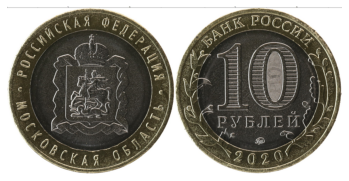

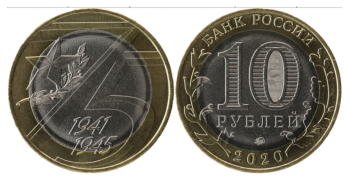

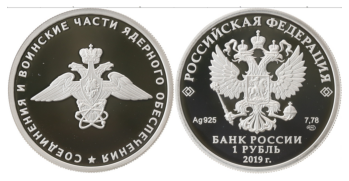

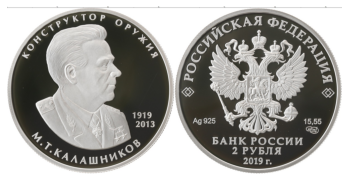

In [ ]:
for i in range(arr.shape[0]):
  plt.imshow(arr[i])
  plt.axis('off')
  plt.show()

In [ ]:
y = [x for x in range(500)] + [8, 6, 99, 122]*2 

In [ ]:
y = np.array(y).reshape(-1, 1)
y

In [ ]:
x1 = np.concatenate((x1, inp, ar))
x1.shape

(508, 420, 840, 3)

(12, 420, 840, 3)

In [ ]:
y_test = np.array([8, 6, 99, 122]).reshape(-1, 1)
y_test

array([[  8],
       [  6],
       [ 99],
       [122]])

In [ ]:
8, 6, 99, 122

In [ ]:
import gc

data = []
for i in df['Avers'][:500]:
  response = requests.get(i)
  img = Image.open(BytesIO(response.content))
  img = img.resize((420, 420))
  img = img.convert('RGB')
  # img = image.load_img(BytesIO(response.content), color_mode='gray', target_size=(1100, 1100))
  data.append(np.array(img))
  print(i)
avers = np.array(data)
data = []
for i in df['Revers'][:500]:
  response = requests.get(i)
  img = Image.open(BytesIO(response.content))
  img = img.resize((420, 420))
  img = img.convert('RGB')
  # img = image.load_img(BytesIO(response.content), color_mode='gray', target_size=(1100, 1100))
  data.append(np.array(img))
  print(i)
revers = np.array(data)
all = np.concatenate((avers, revers), axis=2)
all.shape
del revers, avers
gc.collect()

https://www.numizmatik.ru/images/shopcoins/2000/01/667/986/1667986_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/667/985/1667985_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/673/908/1673908_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/612/954/1612954_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/584/259/1584259_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/576/172/1576172_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/547/885/1547885_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/612/955/1612955_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/562/549/1562549_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/635/839/1635839_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/621/073/1621073_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/653/036/1653036_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/607/466/1607466_a.jpg
https://www.numizmatik.ru/images/shopcoins/2000/01/

11

In [ ]:
np.save('/content/drive/My Drive/models/all1.npy', all)

In [ ]:
all.shape

(500, 420, 840, 3)

In [ ]:
revers.shape

(100, 550, 550, 3)

In [ ]:
avers = avers[:100]

In [ ]:
all = np.concatenate((avers, revers), axis=2)

In [ ]:
all.shape

(100, 550, 1100, 3)

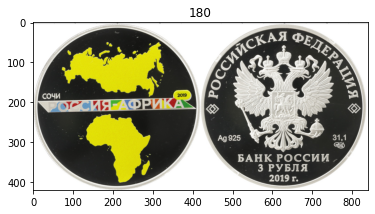

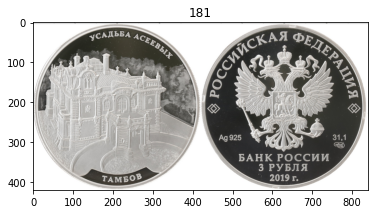

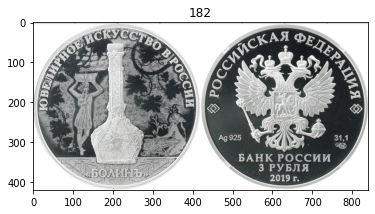

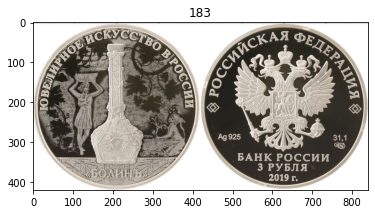

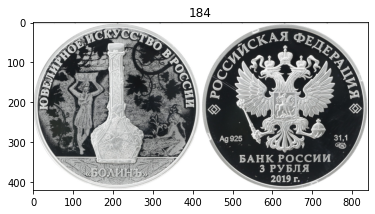

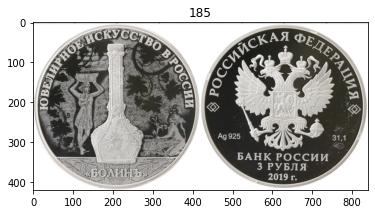

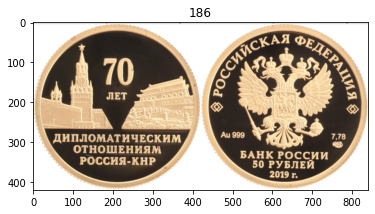

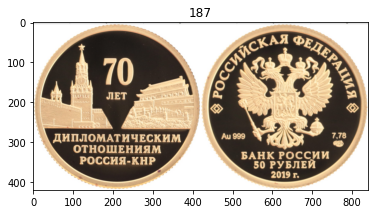

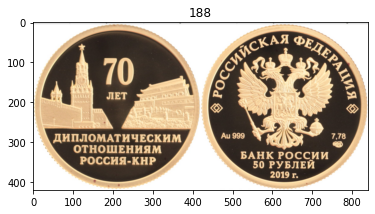

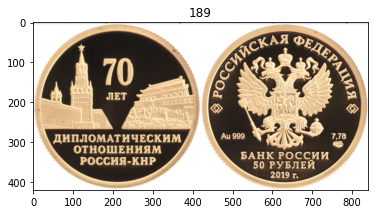

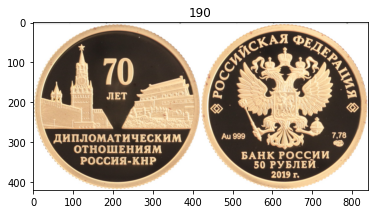

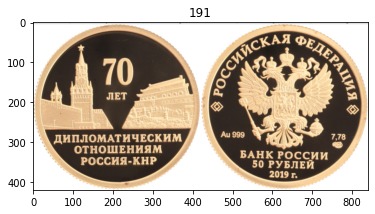

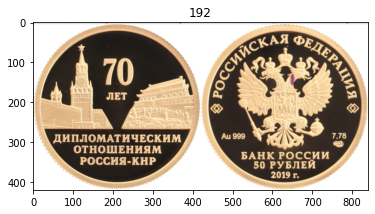

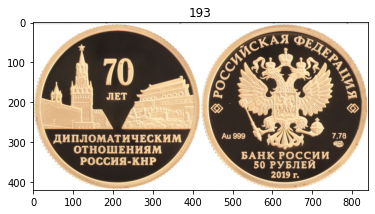

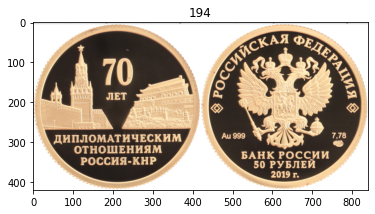

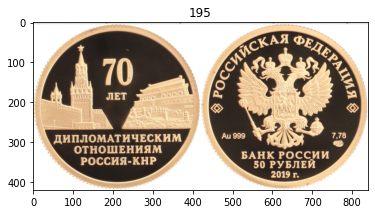

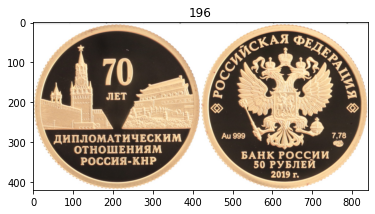

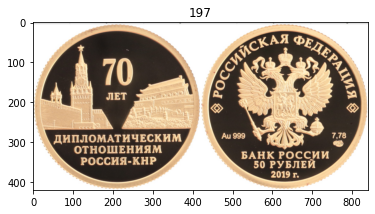

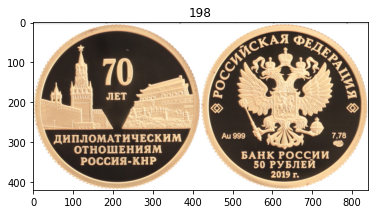

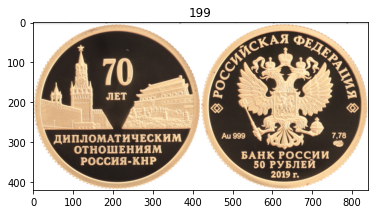

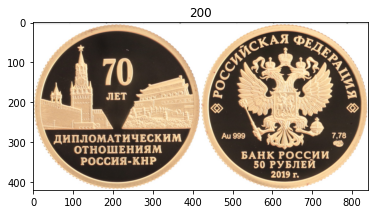

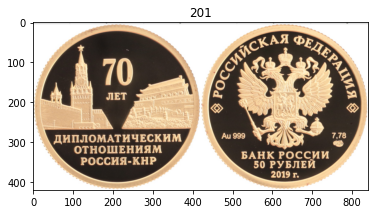

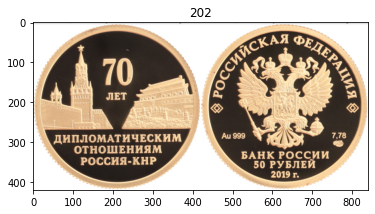

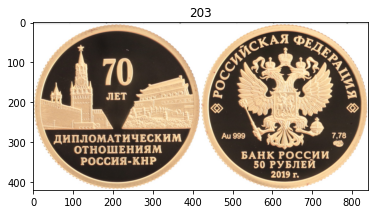

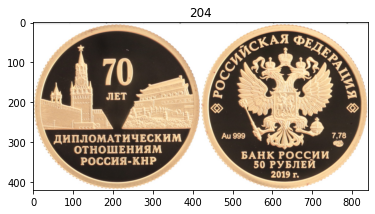

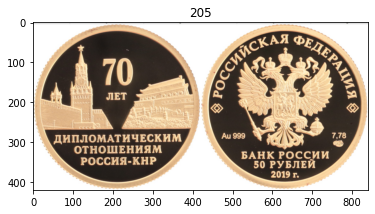

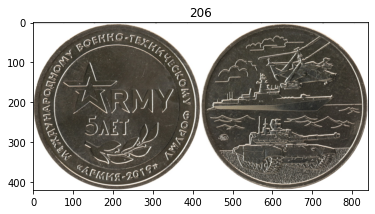

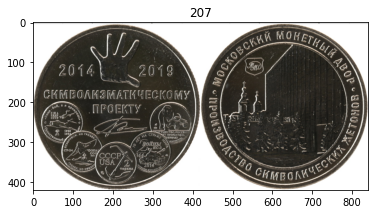

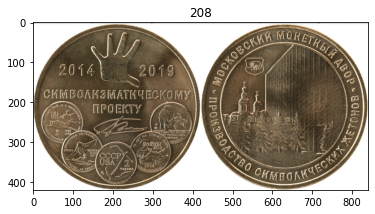

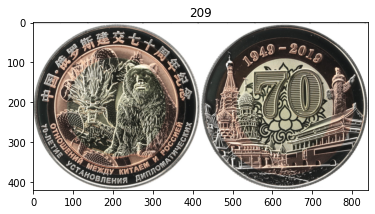

In [ ]:
for i in range(180, 210):
  plt.imshow(x1[i])
  plt.title(str(i))
  plt.show()

In [ ]:
np.save('/content/drive/My Drive/models/mon125.npy', x)

In [ ]:
df.head()

Name  ...                                             Revers
0  1 рубль - FC3316  ...  https://www.numizmatik.ru/images/shopcoins/200...
1  1 рубль - FC3261  ...  https://www.numizmatik.ru/images/shopcoins/200...
2  3 рубля - BS-186  ...  https://www.numizmatik.ru/images/shopcoins/200...
3  1 рубль - CS-385  ...  https://www.numizmatik.ru/images/shopcoins/200...
4  1 рубль - CS-093  ...  https://www.numizmatik.ru/images/shopcoins/200...

[5 rows x 6 columns]

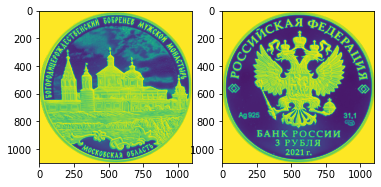

In [ ]:
# plt.figure(figsize=(10, 20))
plt.subplot(121)
plt.imshow(aver[2])
plt.subplot(122)
plt.imshow(rever[2])
plt.show()

In [ ]:
for i in l:
  data = np.array(i)
  l1.append(data)
np.array(l1).shape

(2, 1166, 1155)

In [ ]:
df.insert(-1, 'Emb', x2)

In [ ]:
from tensorflow.keras.utils import to_categorical

y = np.arange(50)
y = np.array([to_categorical(y1, 50) for y1 in y])
y = y.reshape(50, 50)
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
y.resize((30, 1))

In [ ]:
x

<KerasTensor: shape=(None, 125) dtype=float32 (created by layer 'dense_1')>

In [ ]:
y = np.arange(500).reshape(-1, 1)
y

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=90, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.2, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Отключаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода #Указываем разделение изображений на обучающую и тестовую выборку
)

In [ ]:
datagen.fit(x1)

In [ ]:
imgGen = datagen.flow(x1, y, batch_size=2)

In [ ]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Multiply, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
def get_model(weights_path=None):
    
    ## [17-june-2018]Use residual after this
    input_tensor = Input(shape=(448,448,3))
    base_model = vgg19.VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor)
    #base_model.summary()
    for layer in base_model.layers:
        layer.trainable = False
        
    model = Model(input=base_model.input, output=base_model.get_layer('fc2').output)  
    model.summary()
    #model = VGG19(weights_path)
    #model.summary()
    return model 

In [ ]:
all = np.load('/content/drive/My Drive/models/all1.npy', allow_pickle=True)

In [ ]:
import gc

del avers, revers
gc.collect()

466

In [ ]:
input_tensor = Input(shape=(1100,1100))
model = vgg19.VGG19(weights='imagenet', include_top=False, input_tensor=None)
model = Model(input=input_tensor, output=model)

In [ ]:
arN = arN/255
reN = reN/255

In [ ]:
arN.shape, reN.shape

((10, 420, 420, 3), (10, 420, 420, 3))

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
x3 = x3[122:132]

In [ ]:
inp1 = Input(shape=(420, 420, 3))
inp2 = Input(shape=(420, 420, 3))
x1 = inp1 - inp2
x2 = inp2 - inp1
inp = Multiply()([inp1, inp2, x1, x2])
# x = BatchNormalization()(inp)
model = vgg19.VGG19(weights='imagenet', include_top=False, input_tensor=inp, classes=500)
for layer in model.layers:
    layer.trainable = False
x = Conv2D(128, 3, padding='same', activation='elu')(model.output)
x = Conv2D(128, 3, padding='same', activation='elu')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(500, activation='elu')(x)
x = BatchNormalization()(x)
x = Dense(50, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
model2 = Model([inp1, inp2], x)
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 420, 420, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 420, 420, 3) 0                                            
__________________________________________________________________________________________________
tf.math.subtract (TFOpLambda)   (None, 420, 420, 3)  0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
tf.math.subtract_1 (TFOpLambda) (None, 420, 420, 3)  0           input_2[0][0]                

In [ ]:
deff = np.load('/content/drive/My Drive/models/deff500.npy', allow_pickle=True)
for i in range(-8, -2, 1):
  model2.layers[i] .set_weights(deff[i+8])

In [ ]:
# import pickle

deffEmb = []
for i in range(-8, 0, 1):
  deffEmb.append(model2.layers[i].get_weights())
with open('/content/drive/My Drive/models/deffEmb.pickle', 'wb') as f:
  pickle.dump(deffEmb, f)

In [ ]:
with open('/content/drive/My Drive/models/deffEmb.pickle', 'rb') as f:
  deffEmb = pickle.load(f)

In [ ]:
pd.to_csv(df)

In [ ]:
model2.compile(optimizer=Adam(1e-5), loss='mae', metrics='mse')

In [ ]:
ind1 = [df.loc[8, 'Emb'], df.loc[6, 'Emb'], df.loc[99, 'Emb'], df.loc[122, 'Emb']]

In [ ]:
ind1 = np.array(ind1).reshape(-1, 1)
ind1

array([[0.51742053],
       [0.5097171 ],
       [0.52184117],
       [0.5208172 ]], dtype=float32)

In [ ]:
x2.shape

TensorShape([None, 420, 420, 3])

In [ ]:
model2.fit([arN, reN], x3, batch_size=2, epochs=100, shuffle=True)

Epoch 1/100
5/5 [==============================] - 1s 71ms/step - loss: 0.0227 - mse: 8.7286e-04
Epoch 2/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0105 - mse: 2.0395e-04
Epoch 3/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0120 - mse: 2.8424e-04
Epoch 4/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0122 - mse: 2.4917e-04
Epoch 5/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0187 - mse: 5.3442e-04
Epoch 6/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0150 - mse: 3.4228e-04
Epoch 7/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0182 - mse: 6.7267e-04
Epoch 8/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0115 - mse: 1.8149e-04
Epoch 9/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0127 - mse: 2.2518e-04
Epoch 10/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0130 - mse: 2.2461e-04
Epoch 11/100
5/5 [===========

In [ ]:
x2 = model2.predict(x1)

In [ ]:
df = df[:500]

In [ ]:
df.shape

(500, 7)

In [ ]:
df['Emb'] = x2

In [ ]:
df['Emb'].nunique()

489

In [ ]:
input_tensor = Input(shape=(420, 840, 3))
model = vgg19.VGG19(weights='imagenet', include_top=False, input_tensor=input_tensor, classes=500)
for layer in model.layers:
    layer.trainable = False
x = Conv2D(128, 3, padding='same', activation='elu')(model.output)
x = Conv2D(128, 3, padding='same', activation='elu')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(1000, activation='relu')(x)
# x = Dense(100, activation='elu')(x)
x = Dense(500, activation='relu')(x)
x = Dense(50, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model1 = Model(model.input, x)
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 420, 840, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 420, 840, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 420, 840, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 210, 420, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 210, 420, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 210, 420, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 105, 210, 128)     0     

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])

In [ ]:
x1[0].shape

(420, 840, 3)

In [ ]:
x2 = np.linspace(0, 1, num=501, endpoint=False).reshape(-1, 1)

In [ ]:
x2[450:]

In [ ]:
pred = model1.predict(x1)
pred

In [ ]:
pred

array([[0.9967796]], dtype=float32)

In [ ]:
model1.fit(imgGen, epochs=400, validation_data=(ar, y_test))

Epoch 1/400
254/254 [==============================] - 45s 175ms/step - loss: 0.5074 - accuracy: 0.0022 - val_loss: 4988.6602 - val_accuracy: 0.0000e+00
Epoch 2/400
254/254 [==============================] - 44s 173ms/step - loss: 0.3718 - accuracy: 0.0017 - val_loss: 5013.2266 - val_accuracy: 0.0000e+00
Epoch 3/400
254/254 [==============================] - 44s 174ms/step - loss: 0.3432 - accuracy: 2.0193e-04 - val_loss: 5018.9316 - val_accuracy: 0.0000e+00
Epoch 4/400
254/254 [==============================] - 44s 174ms/step - loss: 0.3018 - accuracy: 0.0022 - val_loss: 4993.6709 - val_accuracy: 0.0000e+00
Epoch 5/400
254/254 [==============================] - 44s 174ms/step - loss: 0.2886 - accuracy: 1.6820e-04 - val_loss: 5032.8350 - val_accuracy: 0.0000e+00
Epoch 6/400
254/254 [==============================] - 44s 175ms/step - loss: 0.2827 - accuracy: 7.8315e-05 - val_loss: 5037.6064 - val_accuracy: 0.0000e+00
Epoch 7/400
254/254 [==============================] - 44s 175ms/step 

In [ ]:
pred = model1.predict(ar)

In [ ]:
for i in range(pred.shape[0]):
  print(pred[i].argmax())

8
6
99
122


In [ ]:
deff = []
for i in range(-6, 0, 1):
  deff.append(model1.layers[i].get_weights())
np.save('/content/drive/My Drive/models/deff125.npy', deff)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
pred.argmax()

10

In [ ]:
df.to_csv('/content/drive/My Drive/models/money.csv')

In [ ]:
ind = np.random.randint(low=0, high=500, size=(10,))
for i in ind:
  pred = model2.predict(x1[i].reshape(1, 420, 840, 3))
  y = pred[0][0] + 1e-6
  y1 = pred[0][0] - 1e-6
  print(i)
  print()
  print(df[(df['Emb'] >= y1)&(df['Emb'] <= y)])



141

                    Name  ...       Emb
141  25 рублей - PK24-13  ...  0.515959

[1 rows x 7 columns]
29

                  Name  ...       Emb
29  25 рублей - Q86-25  ...  0.523517

[1 rows x 7 columns]
238

                   Name  ...       Emb
238  2 рубля - TL113-12  ...  0.529085

[1 rows x 7 columns]
455

                   Name  ...       Emb
455  10 рублей - X49-24  ...  0.524368

[1 rows x 7 columns]
143

                    Name  ...       Emb
143  25 рублей - KH93-14  ...  0.506599

[1 rows x 7 columns]
202

                    Name  ...       Emb
194  50 рублей - ZL12-09  ...  0.500775
195  50 рублей - ZL12-10  ...  0.500775
196  50 рублей - ZL12-11  ...  0.500775
197  50 рублей - ZL12-12  ...  0.500775
198  50 рублей - ZL13-01  ...  0.500775
199  50 рублей - ZL13-02  ...  0.500775
200  50 рублей - ZL13-03  ...  0.500775
201  50 рублей - ZL13-04  ...  0.500775
202  50 рублей - ZL13-05  ...  0.500775
203  50 рублей - ZL13-06  ...  0.500775
204  50 рублей - ZL13-07  ...

In [ ]:
np.save('/content/drive/My Drive/models/all.npy', all)

In [ ]:
pred = model2.predict([arN, reN, defN])
pred

array([[0.5183881 ],
       [0.51376975],
       [0.50776494],
       [0.51741385],
       [0.52534145],
       [0.523375  ],
       [0.5141405 ],
       [0.5224637 ],
       [0.36726725],
       [0.35030043]], dtype=float32)

In [ ]:
defN1 = reN-arN

In [ ]:
pred = model2.predict([reN, arN])
pred

array([[0.44588834],
       [0.3558534 ],
       [0.3967323 ],
       [0.47265393],
       [0.44077855],
       [0.5220905 ],
       [0.42242894],
       [0.25773382],
       [0.31074062],
       [0.38814232]], dtype=float32)

In [ ]:
pr_s = [str(x[0]) for x in pred]

In [ ]:
pr_s

['0.48454562', '0.50501823', '0.4682991', '0.48545882']

In [ ]:
y = pred[0][0] + 5e-5
y1 = pred[0][0] - 5e-5
y, y1

In [ ]:
df[(df['Emb'] >= y1)&(df['Emb'] <= y)]

Empty DataFrame
Columns: [Name, Year, Nom, LongName, Avers, Revers, Emb]
Index: []

In [ ]:
df1 = df['Emb'].astype(str)

In [ ]:
df['EmbS'] = df1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      500 non-null    object 
 1   Year      500 non-null    float64
 2   Nom       500 non-null    float64
 3   LongName  500 non-null    object 
 4   Avers     500 non-null    object 
 5   Revers    500 non-null    object 
 6   Emb       500 non-null    float32
 7   EmbS      500 non-null    object 
dtypes: float32(1), float64(2), object(5)
memory usage: 53.2+ KB
